In [173]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [174]:
df = pd.read_csv("census-income.csv")

In [175]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [176]:
df.columns = ['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       'income']
       

salary_map={' <=50K':1,' >50K':0}
df['income']=df['income'].map(salary_map).astype(int)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,1
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,0
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,1
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,1


In [177]:
def whitespace_remover(dataframe):
   
    # iterating over the columns
    for i in dataframe.columns:
         
        # checking datatype of each columns
        if dataframe[i].dtype == 'object':
             
            # applying strip function on column
            dataframe[i] = dataframe[i].map(str.strip)
        else:
             
            # if condn. is False then it will do nothing.
            pass
 # applying whitespace_remover function on dataframe
whitespace_remover(df)

In [178]:
print(df.shape)
df[' native-country'] = df[' native-country'].replace('?',np.nan)
df[' workclass'] = df[' workclass'].replace('?',np.nan)
df[' occupation'] = df[' occupation'].replace('?',np.nan)
print(df.shape)


(32561, 15)
(32561, 15)


In [179]:
df = df.dropna()
print(df.shape)

(30162, 15)


In [180]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,1
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,0
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,1
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,1


In [181]:
r_data = df[['age',' workclass',' education']]

In [182]:
r_data.describe(include= 'all')
r_data[[' workclass',' education']] =r_data[[' workclass',' education']].astype('category')

In [183]:
X =pd.get_dummies(r_data,drop_first = True)
df['income'] = (df['income'].astype('category')).cat.codes 
y = df['income']

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=42)

In [185]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [186]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [187]:
confusion_matrix(y_test,y_pred)

array([[ 1835,  4151],
       [ 1198, 16946]], dtype=int64)

In [188]:
accuracy_score(y_test,y_pred)

0.7783257355988397

In [189]:
print(X_test)

[[-0.77249083 -0.27110998  0.58909246 ... -0.03155448  7.51316305
  -0.52850858]
 [ 0.214678   -0.27110998  0.58909246 ... -0.03155448 -0.13309973
  -0.52850858]
 [ 1.12591077 -0.27110998  0.58909246 ... -0.03155448 -0.13309973
  -0.52850858]
 ...
 [-1.53185147 -0.27110998  0.58909246 ... -0.03155448 -0.13309973
  -0.52850858]
 [ 0.67029438 -0.27110998  0.58909246 ... -0.03155448 -0.13309973
  -0.52850858]
 [ 0.74623045 -0.27110998  0.58909246 ... -0.03155448 -0.13309973
  -0.52850858]]


In [190]:
type(X_test)

numpy.ndarray

In [191]:

print(df["income"].corr(df["age"]))
print(df["income"].corr(df[" education-num"]))
print(df["income"].corr(df[" hours-per-week"]))

-0.24199813626611838
-0.33528619675263815
-0.22948012988851021


In [192]:
df = df.join(pd.get_dummies(df[" occupation"]))
df = df.drop(df[" occupation"], axis=1)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,1
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,0
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,1
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,1


In [1]:
df = df.join(pd.get_dummies(df[' workclass']))
df = df.drop(df[" workclass"], axis=1)
df

NameError: name 'df' is not defined

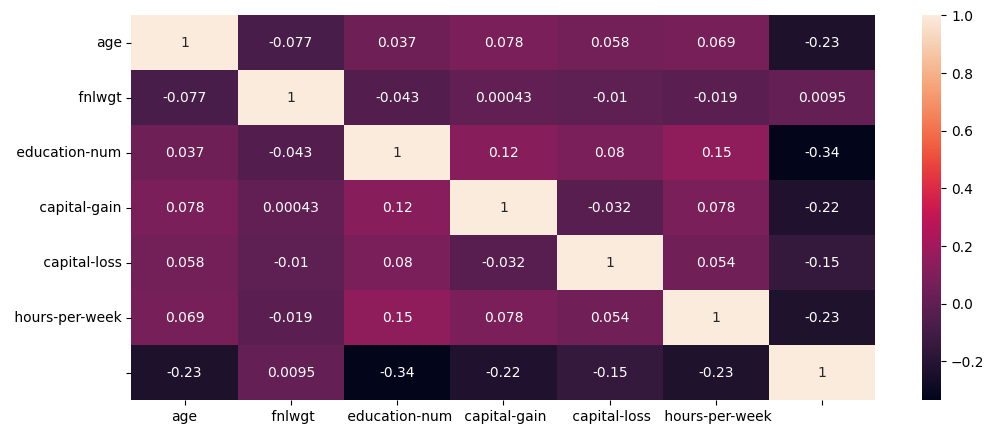

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



df = pd.read_csv("census-income.csv")
df = df.drop(" workclass", axis=1)
df = df.drop(" education", axis=1)
df = df.drop(" marital-status", axis=1)
df = df.drop(" occupation", axis=1)
df = df.drop(" relationship", axis=1)
df = df.drop(" race", axis=1)
df = df.drop(" sex", axis=1)
df = df.drop(" native-country", axis=1)
df = df.dropna()
df[" "] = df[" "].map({" <=50K":0, " >50K":1}).astype(int)


plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True)
plt.show()
